# Libraries

In [5]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd # https://python-sounddevice.readthedocs.io/
from ChunksProcessing.PyChronux import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [224]:
fs = 44100
t_end = 1
fm_ini = 0
fm_end = fs/2

t = np.arange(0, t_end, 1/fs)
n = len(t)
f = np.linspace(start=fm_ini, stop=fm_end, num=n)#*(np.sin(2*np.pi*np.arange(n)/n)+1)
data = np.sin(2*np.pi*f*t)

# sd.play(data, fs, loop=True) # loop through sample
# sd.stop() # stop sound device play

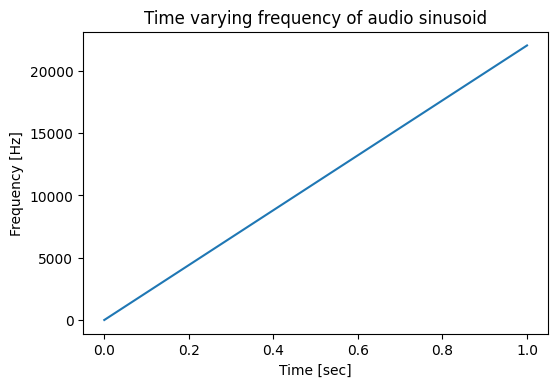

In [226]:
fig = plt.figure(dpi=100)
ax = plt.axes()
ax.plot(t, f)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Time varying frequency of audio sinusoid')
plt.show()

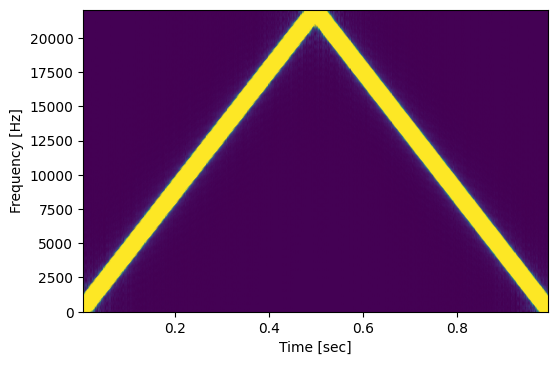

In [227]:
params = Params(tapers = [7, 11], Fs=fs, pad=0, fpass=[0, fs/2], trialave=0, err=[0, 0.05])
movingwin = [0.01, 0.001]
S, t, f = mtspecgramc(data.ravel(), movingwin, params)
S[:] = (S-np.min(S))/(np.max(S)-np.min(S))

chunked_pcolormesh(t, f, S)